In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics.pairwise import pairwise_distances

In [13]:
data, colors = datasets.make_blobs(n_samples=500, n_features = 2, centers=2, cluster_std=[2., 0.5], random_state=21)

In [14]:
def plot_gaussian(ax, xpos, ypos, sigma):
    size = 100
    xl = ax.get_xlim()
    yl = ax.get_xlim()
    x = np.linspace(xl[0], xl[1], 100)
    y = np.linspace(yl[0], yl[1], 100)

    xx, yy = np.meshgrid(x, y)
    z = (1/(2*np.pi*sigma**2) * np.exp(-((xx - xpos)**2/(2*sigma**2)
         + (yy - ypos)**2/(2*sigma**2))))

    ax.contour(xx, yy, z, cmap='magma', levels=10)

In [15]:
def entropy(data, i, sigma):
    N = data.shape[0]
    
    distances = pairwise_distances(data, metric="euclidean", squared=True)
    p_jis = np.zeros((N,))
    
    running_sum = 0.0
    for j in range(N):
        if i == j:
            p_jis[j] = 0
        else:
            p_jis[j] = np.exp(-distances[i, j] / (2 * sigma**2))
            running_sum += p_jis[j]
           
    # normalization step
    p_jis /= running_sum
    
    p_jis = np.maximum(p_jis, 1e-16)
            
    neg_entropy = 0.0
    for j in range(N):
        neg_entropy += p_jis[j] * np.log(p_jis[j])
        
    return -neg_entropy

Pick a point at random from each cluster

In [16]:
cluster_1_indices = np.where(colors == 0)[0]
IDX_1 = np.random.choice(cluster_1_indices)

cluster_2_indices = np.where(colors == 1)[0]
IDX_2 = np.random.choice(cluster_2_indices)

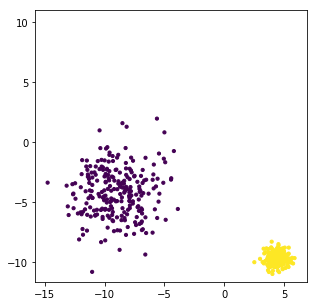

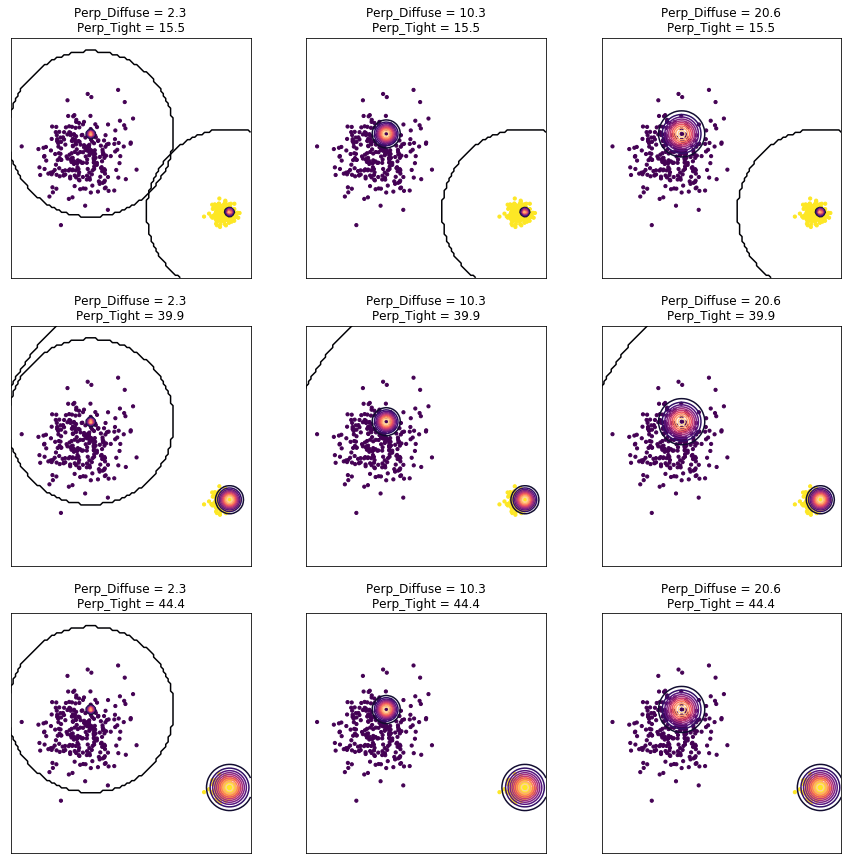

In [17]:
plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1], c=colors, s=10)
plt.axis('square')

sigmas_1 = [.2, .6, 1, 
            .2, .6, 1, 
            .2, .6, 1] 

sigmas_2 = [.2, .2, .2,
            .6, .6, .6,
            1, 1, 1]

fig = plt.figure(figsize=(15, 15))
for sigma_idx, (sigma_1, sigma_2) in enumerate(zip(sigmas_1, sigmas_2)):
    ax = fig.add_subplot(3, 3, sigma_idx + 1)
    ax.scatter(data[:, 0], data[:, 1], c=colors, s=10)
    
    plot_gaussian(ax, data[IDX_1, 0], data[IDX_1, 1], sigma_1)
    plot_gaussian(ax, data[IDX_2, 0], data[IDX_2, 1], sigma_2)
    
    entropy_1 = entropy(data, IDX_1, sigma_1)
    entropy_2 = entropy(data, IDX_2, sigma_2)
    perp_1 = 2**entropy_1
    perp_2 = 2**entropy_2

    t_str = "Perp_Diffuse = %.1f\nPerp_Tight = %.1f" % (perp_1, perp_2)
    ax.set_title(t_str)
    ax.axis('square')
    ax.set_xticks([])
    ax.set_yticks([])